# Capstone Project - Predicting Accident Severity

## Applied Data Science Capstone by IBM/Coursera

### INTRODUCTION

In this Project,we try to predict the severity of accidents taking into consideration many facts such as location,collision type,no. of vehicles involved etc.
We all must have undertaken journeys at critical moments of time but in some cases there might be a dilemma about whether to pursue our journey or not. Sometimes we go on nevertheless and it may lead to fatal consequences. But we all can agree upon the fact that undertaking a journey on a cold rainy night with a possible chances of hurricanes are absolutely dangerous when compared to normal days. These are two extreme instances and we can choose our options wisely in these type of scenarios. But sometimes weather or some other factors may be change all of a sudden, and we may be a little too late to make any decisions in such a scenario.
But what if some computer generated model can warn us about potential hazards ? 
Since data over the course of many years is available to computers , we can count on the predictions of the model since it will be at least as accurate as ours, provided the data is accurate and updated.

## DATA

Data I have chosen is the given csv file itself which contains about 37 columns like objectid,location,severity , person count etc. The given dataset is not complete i.e some missing values in some columns namely (x,y) , EXCEPTRSNDESC ,to name a few

There are many columns with categorical values as well as some columns are purely numeric . Columns with categorical values will not help in regression estimation and the dataset should be trimmed adeqautely in order to obtain the correct sample for undergoing regression,

The column Severity-Code contains two discrete values 1&2 which gives us information whether the accident is more/less severe. where 1 is less severe.

There are of course many more columns which gives us important details such as weather , road condition,light condition etc which may be transformed into dummy columns with binary values for the ease of processing.Other data preparation involves balancing the labelled data, transformation, filling missing data, and cleaning the dataset etc.

After appropriate sampled data is obtained , we can chose an appropriate machine learning model to fit the data and predict the estimates.

At last we must also ensure that sufficient level of accuracy is obtained as well !

no. of cols : 37
no.of rows : 194673

## Importing Libraries

In [195]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

### Getting data

In [142]:
!wget -O Data-Collisons.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-09 07:15:52--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisons.csv’

100%[======================================>] 73,917,638  36.6MB/s   in 1.9s   

2020-09-09 07:15:54 (36.6 MB/s) - ‘Data-Collisons.csv’ saved [73917638/73917638]



### Reading data to dataframe df !

In [143]:
df=pd.read_csv('Data-Collisons.csv')
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

#### Exploring using value_counts() function

In [93]:
df['SEVERITYCODE'].value_counts()
df['X'].value_counts()
df['Y'].value_counts()
df['INCKEY'].value_counts()
df['COLDETKEY'].value_counts()
df['REPORTNO'].value_counts()
df['STATUS'].value_counts()


Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64

### By exploring first few rows , we see that Severity code corresponds to SEVERITYDESC i.e 1 means property damage only collision 2 means injury collison !
### X & Y are location and some values are missing
### INCKEY and COLDETkey has similar values and we can use object id which is a more reliable and continuos index
### Reportno has 3 ambiguos values so we wont consider it while sampling
### Status has no relevant metadata info !

In [9]:
# NOw exploring even more columns with value_counts()

In [94]:
df['ADDRTYPE'].value_counts()
df['INTKEY'].value_counts()
df['COLLISIONTYPE'].value_counts()
df['PERSONCOUNT'].value_counts()
df['PEDCOUNT'].value_counts()
df['VEHCOUNT'].value_counts()
df['UNDERINFL'].value_counts()
df['WEATHER'].value_counts()
df['ROADCOND'].value_counts()
df['LIGHTCOND'].value_counts()
df['ST_COLCODE'].value_counts()
df['SEGLANEKEY'].value_counts()
df['CROSSWALKKEY'].value_counts()
df['SDOT_COLCODE'].value_counts()
df['INATTENTIONIND'].value_counts()
df['EXCEPTRSNCODE'].value_counts()


       79173
NEI     5638
Name: EXCEPTRSNCODE, dtype: int64

### Some insights understood by exploring all the columns 

### EXCEPTRSNDESC : "not enough information"		//REMOVE EVERY ROW WITH "NEI" value in this column
EXCEPTRSNCODE : NEI					

object id - index - because it is continuosly numbered

INCKEY(unique key for incident) & COLDETKEY (secondary key) :       // contains pretty much same values except for very few values.

REPORT NO., STATUS - no info
3 pairs of report number have same report number 

ADDRTYPE : intersection,block,alley etc 3 Types only !

STATUS : matched / unmatched 				NO METADATA IS AVAILABLE 

INTKEY : intersection key (only for addrtype=intersection)			//
LOCATION : text values of loc. //not neeeded

SEVERITY CODE_1 : same as #SEVERITY CODE can be dropped 		 	//CAN BE DROPPED

SEVERITY_DESC : 1--> "property damage" , 2--> injury collssion       		//CAN BE DROPPED

COLLISION TYPE :	Parked Car    47987
			Angles        34674
			Rear Ended    34090
			Other         23703
			Sideswipe     18609
			Left Turn     13703
			Pedestrian     6608
			Cycles         5415
			Right Turn     2956
			Head On        2024
				Name: COLLISIONTYPE, dtype: int64 

PERSONCOUNT : Double The total number of people involved in the collision
PEDCOUNT : Double The number of pedestrians involved in the collision. This is entered by the state.
PEDCYLCOUNT : Double The number of bicycles involved in the collision.This is entered by the state.
VEHCOUNT : Double The number of vehicles involved in the collision.
INJURIES : Double The number of total injuries in the collision. Thisis entered by the state.
SERIOUSINJURIES : Double The number of serious injuries in the collision.This is entered by the state.
FATALITIES : Double The number of fatalities in the collision. This is entered by the state		

INCDATE , INCDTTM : date and time and timestamp of incident

UNDERINFL - contains 0/1 and true/false both kind of values are present !

WEATHER,ROADCOND,LIGHTCOND : can all be considered



PEDROWNOTGRNT : //MOST OF THE VALUES ARE NULL !!  			#REMOVE THIS COLUMN

SDOTCOLNUM : No. given by SDOT , can be removed !			#MAY REMOVE

SPEEDING : MOst of the columns have a null value !			#CAN BE REMOVED 

ST_COLCODE : Some values have redundant entries ie 11 have two 			#can be removed
		 IT is because numbers are entered both as string and int , so covert everything to int and remove rows with invlaid ST_colcode ie (>84,75-80 ) etc which are not in metadata
         
ST_COLDESC : CORRECTLY MApped to st_colcode , same problem !

#####SDOT_COLDESC AND ST_COLDESC have some differences

INATTENTIONIND : MOst values are null !!`					#can be removed

SEGLANEKEY : A key for the lane segment in which the collision occurred.		#CAN BE REMOVED !!
		Most values are zeroes 

		
CROSSWALKKEY : same !! most are zeroes						#can be removed !


HITPARKEDCAR : NO null values ! either YES OR NO 

In [144]:
data=df.copy()
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Removing EXCEPTRSNCODE = "NEI"


In [145]:
nei_index=data[data['EXCEPTRSNCODE']=="NEI"].index #THERE ARE INSUFFICIENT INFO IN THESE ROWS 
data.drop(nei_index,inplace=True)
data.shape

(189035, 38)

### REmoving columns which are of no use !


In [146]:
df=data.copy()
df.drop(['SEVERITYCODE.1','PEDROWNOTGRNT','SPEEDING','SEGLANEKEY','CROSSWALKKEY','INATTENTIONIND','COLDETKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM'],axis=1,inplace=True)

In [147]:
df.shape
data=df.copy()
data.shape
data.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            194663, 194664, 194665, 194666, 194667, 194668, 194669, 194670,
            194671, 194672],
           dtype='int64', length=189035)

### WE are only selecting columns which are of our use - by disregarding columns such as Location which need to be removed but they cannot be used in the sample


In [148]:
data=data[['SEVERITYCODE','X','Y','OBJECTID','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','VEHCOUNT','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','ST_COLCODE','HITPARKEDCAR']]
data.head()
data.shape

(189035, 15)

In [13]:
data.describe(include='all')

,SEVERITYCODE,X,Y,OBJECTID,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
count,189035.000000,185653.000000,185653.000000,189035.000000,189032,184904,189035.000000,189035.000000,189035.000000,184921,184737,184805,184667,189018,189035
unique,NaN,NaN,NaN,NaN,3,10,NaN,NaN,NaN,4,11,9,9,115,2
top,NaN,NaN,NaN,NaN,Block,Parked Car,NaN,NaN,NaN,N,Clear,Dry,Daylight,32,N
freq,NaN,NaN,NaN,NaN,123890,44766,NaN,NaN,NaN,96132,109741,123038,114331,24824,183083
mean,1.305092,-122.330503,47.619526,107309.129939,NaN,NaN,2.458116,0.037538,1.928262,NaN,NaN,NaN,NaN,NaN,NaN
std,0.460447,0.029968,0.056274,62739.837718,NaN,NaN,1.358813,0.199208,0.626162,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,-122.419091,47.495573,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,-122.348673,47.575623,53115.500000,NaN,NaN,2.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,-122.330258,47.615310,104661.000000,NaN,NaN,2.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,-122.311937,47.663849,160926.500000,NaN,NaN,3.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
### we are also dropping X,Y co ordinates for the location as well since some values are missing and difference between max y and min y is just 0.23
df['Y'].max()-df['Y'].min()
data.drop(['X','Y'],axis=1,inplace=True)
data.shape

(189035, 13)

In [150]:
### THERE are some columns with null values !
df['ADDRTYPE'].isnull().value_counts()

False    189032
True          3
Name: ADDRTYPE, dtype: int64

### I found out that some columns have some null values , beacuse no.of rows of null values is very very small compared to total no.of rows , we can remove those rows!

In [151]:
addrtypenull=data[data['ADDRTYPE'].isnull()==True].index
data.drop(addrtypenull,inplace=True)
collisiontypenull=data[data['COLLISIONTYPE'].isnull()==True].index
data.drop(collisiontypenull,inplace=True)

underinflnull=data[data['UNDERINFL'].isnull()==True].index
data.drop(underinflnull,inplace=True)
data.shape

weathernull=data[data['WEATHER'].isnull()==True].index
data.drop(weathernull,inplace=True)
data.shape

#data.describe(include='all')
roadcondnull=data[data['ROADCOND'].isnull()==True].index
data.drop(roadcondnull,inplace=True)

lightcondnull=data[data['LIGHTCOND'].isnull()==True].index
data.drop(lightcondnull,inplace=True)
data.describe(include='all')

data.shape


(184489, 13)

In [27]:
### Some 4546 rows are removed

# Data Transformation !

In [152]:
#st_colcode column have both int and string values , so they need to be converted to int
column_values = data[['ST_COLCODE']].values.ravel()
unique_values =  pd.unique(column_values)
unique_values

array(['10', '11', '32', '23', '5', '22', '14', '30', '28', '51', '13',
       '50', '12', '45', '0', '20', '21', '1', '52', '16', '15', '74',
       '81', '26', '19', '2', '66', '71', '3', '24', '40', '57', '6',
       '83', '25', '27', '4', '72', '29', '56', '73', '41', '17', '65',
       '82', '67', '49', '84', '31', '43', '42', '48', '64', '53', 32, 50,
       15, 10, 14, 20, 13, 22, 51, 11, 28, 12, 52, 21, 0, 19, 30, 16, 40,
       26, 27, 83, 2, 45, 65, 23, 24, 71, 1, 29, 81, 25, 4, 73, 74, 72, 3,
       84, 64, 57, 42, 41, 48, 66, 56, 82, 67, '54', '60', 53, 31, 43, 87,
       54, '87', '7', '8', '85', '88', '18'], dtype=object)

In [153]:
data['ST_COLCODE']=data['ST_COLCODE'].astype(int)


In [154]:
column_values = data[['ST_COLCODE']].values.ravel()
unique_values =  pd.unique(column_values)
unique_values.sort()
unique_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 40, 41,
       42, 43, 45, 48, 49, 50, 51, 52, 53, 54, 56, 57, 60, 64, 65, 66, 67,
       71, 72, 73, 74, 81, 82, 83, 84, 85, 87, 88])

In [31]:
### But some are invalid values which are not in the metadata 


In [155]:
greaterthan_84_index=data[data['ST_COLCODE']>84].index
data.drop(greaterthan_84_index,inplace=True)
invalid_st_colcode_index=data[data['ST_COLCODE']==6].index
data.drop(invalid_st_colcode_index,inplace=True)
data.shape
invalid_st_colcode_index=data[data['ST_COLCODE']==7].index
data.drop(invalid_st_colcode_index,inplace=True)
data.shape
invalid_st_colcode_index=data[data['ST_COLCODE']==8].index
data.drop(invalid_st_colcode_index,inplace=True)
data.shape
invalid_st_colcode_index=data[data['ST_COLCODE']==9].index
data.drop(invalid_st_colcode_index,inplace=True)
data.shape
invalid_st_colcode_index=data[data['ST_COLCODE']==17].index
data.drop(invalid_st_colcode_index,inplace=True)
data.shape
invalid_st_colcode_index=data[data['ST_COLCODE']==18].index
data.drop(invalid_st_colcode_index,inplace=True)
data.shape
invalid_st_colcode_index=data[data['ST_COLCODE']==33].index
data.drop(invalid_st_colcode_index,inplace=True)
data.shape
#33-39 is not present in dataset
invalid_st_colcode_index=data[data['ST_COLCODE']==58].index
data.drop(invalid_st_colcode_index,inplace=True)
data.shape
#58,59 also not present
#68,69,70 also no present
#75-80 also not present


(184166, 13)

In [33]:
### UNDER_INFL has both N,Y and 0,1 

In [138]:
data['UNDERINFL'].value_counts()
data

,SEVERITYCODE,OBJECTID,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,2,1,Intersection,Angles,2,0,2,0,Overcast,Wet,Daylight,10,0
1,1,2,Block,Sideswipe,2,0,2,0,Raining,Wet,Dark - Street Lights On,11,0
2,1,3,Block,Parked Car,4,0,3,0,Overcast,Dry,Daylight,32,0
3,1,4,Block,Other,3,0,3,0,Clear,Dry,Daylight,23,0
4,2,5,Intersection,Angles,2,0,2,0,Raining,Wet,Daylight,10,0
5,1,6,Intersection,Angles,2,0,2,0,Clear,Dry,Daylight,10,0
6,1,7,Intersection,Angles,2,0,2,0,Raining,Wet,Daylight,10,0
7,2,9,Intersection,Cycles,3,0,1,0,Clear,Dry,Daylight,5,0
8,1,10,Block,Parked Car,2,0,2,0,Clear,Dry,Daylight,32,0
9,2,12,Intersection,Angles,2,0,2,0,Clear,Dry,Daylight,10,0


In [156]:
data=data.replace(to_replace=['Y','N'],value=[1,0])
data=data.replace(to_replace=['1','0'],value=[1,0])
data['UNDERINFL'].value_counts()

0    175139
1      9027
Name: UNDERINFL, dtype: int64

### WE NEED TO CHANGE VALUE 1 TO 0 && 2to 1 in SEVERITYCODE for preparing for logistic regression !!!
1 --> INJURY collision
0 --> Property damage only collsion

# WARNING : EXECUTE THE CODE BELOW EXACTLY ONCE ONLY !!!!

In [157]:
data[['SEVERITYCODE']]=data[['SEVERITYCODE']].replace(1,0)
data[['SEVERITYCODE']]=data[['SEVERITYCODE']].replace(2,1)
data
# WE Transform like this because we need to measure % of chance of injury which is easier after we do such transformation

,SEVERITYCODE,OBJECTID,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,1,1,Intersection,Angles,2,0,2,0,Overcast,Wet,Daylight,10,0
1,0,2,Block,Sideswipe,2,0,2,0,Raining,Wet,Dark - Street Lights On,11,0
2,0,3,Block,Parked Car,4,0,3,0,Overcast,Dry,Daylight,32,0
3,0,4,Block,Other,3,0,3,0,Clear,Dry,Daylight,23,0
4,1,5,Intersection,Angles,2,0,2,0,Raining,Wet,Daylight,10,0
5,0,6,Intersection,Angles,2,0,2,0,Clear,Dry,Daylight,10,0
6,0,7,Intersection,Angles,2,0,2,0,Raining,Wet,Daylight,10,0
7,1,9,Intersection,Cycles,3,0,1,0,Clear,Dry,Daylight,5,0
8,0,10,Block,Parked Car,2,0,2,0,Clear,Dry,Daylight,32,0
9,1,12,Intersection,Angles,2,0,2,0,Clear,Dry,Daylight,10,0


In [37]:
data.describe(include='all')

,SEVERITYCODE,OBJECTID,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
count,184166.000000,184166.000000,184166,184166,184166.000000,184166.000000,184166.000000,184166.000000,184166,184166,184166,184166.000000,184166.000000
unique,NaN,NaN,3,10,NaN,NaN,NaN,NaN,11,9,9,NaN,NaN
top,NaN,NaN,Block,Parked Car,NaN,NaN,NaN,NaN,Clear,Dry,Daylight,NaN,NaN
freq,NaN,NaN,120615,44624,NaN,NaN,NaN,NaN,109370,122564,114004,NaN,NaN
mean,0.694194,105534.797118,NaN,NaN,2.471851,0.038357,1.973133,0.049016,NaN,NaN,NaN,22.730249,0.030570
std,0.460749,62191.343752,NaN,NaN,1.367716,0.201332,0.560876,0.215901,NaN,NaN,NaN,14.555024,0.172151
min,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000
25%,0.000000,51993.250000,NaN,NaN,2.000000,0.000000,2.000000,0.000000,NaN,NaN,NaN,11.000000,0.000000
50%,1.000000,102076.500000,NaN,NaN,2.000000,0.000000,2.000000,0.000000,NaN,NaN,NaN,15.000000,0.000000
75%,1.000000,158377.750000,NaN,NaN,3.000000,0.000000,2.000000,0.000000,NaN,NaN,NaN,32.000000,0.000000


### We are moving on to deriving some useful insights by grouping data!


In [23]:
data.groupby('ADDRTYPE').mean()

,SEVERITYCODE,X,Y,OBJECTID,PERSONCOUNT,PEDCOUNT,VEHCOUNT,UNDERINFL,ST_COLCODE,HITPARKEDCAR
ADDRTYPE,,,,,,,,,,
Alley,0.891892,NaN,NaN,95923.747297,1.905405,0.050000,1.682432,0.054054,32.906757,0.001351
Block,0.758231,-122.330588,47.618118,103379.731617,2.413158,0.017170,2.011093,0.056096,24.814584,0.045500
Intersection,0.568897,-122.330284,47.622202,109786.367738,2.591234,0.078903,1.903663,0.035360,18.607839,0.002245


we can understand that accidents at intersection are more inury prone & accidents at alley are mostly property damage only colllsion! 
### accidents in alley typically involved less persons
### lesser influence of alcohol in accidents at intersections 
### parked cars suffer much more damage in block than other 2 ollsions in alley are very rare compared to other 2 !
####less influence of alcohol in Intersection accidents
### Accidents involving parked cars far occur more in Block 
### More pedestrians are involoved in Intersection  accidents and very less in block !


In [45]:
data.groupby('COLLISIONTYPE').mean()

,SEVERITYCODE,OBJECTID,PERSONCOUNT,PEDCOUNT,VEHCOUNT,UNDERINFL,ST_COLCODE,HITPARKEDCAR
COLLISIONTYPE,,,,,,,,
Angles,0.606185,111062.462603,2.713125,0.001712,2.076013,0.028461,10.000000,0.000551
Cycles,0.121864,114831.328753,2.128236,0.015333,0.981083,0.025886,41.726404,0.001991
Head On,0.565500,111131.557500,2.734000,0.000000,2.128500,0.096000,27.908500,0.005500
Left Turn,0.604083,108587.095528,2.705485,0.001615,2.052133,0.021294,25.101916,0.000441
Other,0.740575,97030.150887,1.815028,0.003056,1.446548,0.111035,40.215915,0.003013
Parked Car,0.940929,98925.642009,2.252555,0.001613,2.155544,0.057413,31.039194,0.121101
Pedestrian,0.100804,115523.876160,2.187229,1.037879,1.014533,0.065090,1.017780,0.000464
Rear Ended,0.567457,106506.096299,2.858977,0.000804,2.224182,0.041207,15.032537,0.001132
Right Turn,0.793009,111798.090473,2.722070,0.001714,2.025017,0.013708,16.000000,0.001714


In [ ]:
according to data pedestrian and cycle are involved in more injury prone and less property only damages 
### Parked car and Sideswipe usualyy result in property only damages ! 
### MOst accidents typically involve 2-3 persons !
### NO head on collison involved pedestrians
### Less alcohol influence involved in Left and Right Turn accidents

In [46]:
data.groupby('PERSONCOUNT').mean()

,SEVERITYCODE,OBJECTID,PEDCOUNT,VEHCOUNT,UNDERINFL,ST_COLCODE,HITPARKEDCAR
PERSONCOUNT,,,,,,,
0,0.678558,164792.762421,0.037355,1.983750,0.000000,21.870377,0.084236
1,0.742800,107984.395357,0.005498,1.010124,0.152121,49.250131,0.003491
2,0.749520,102395.418031,0.049190,1.899898,0.033467,22.284256,0.037822
3,0.620330,106142.967066,0.029856,2.165531,0.056778,19.095148,0.021112
4,0.569655,105072.742379,0.020649,2.347192,0.062365,18.190862,0.016463
5,0.548777,103611.661468,0.017125,2.449694,0.066361,17.635474,0.013456
6,0.497583,101788.013760,0.018594,2.604314,0.082187,17.248048,0.011528
7,0.436331,104965.008905,0.016919,2.810329,0.091719,17.208370,0.006233
8,0.466165,103911.336466,0.045113,2.772556,0.078947,16.359023,0.003759


In [ ]:
NO influence of alcohol in accidents involving 13 or more people !
No parked cars where hit in accidents involving 10 or more people
NO pedestrian was involved in accidents involving 18 or more people (except 1 pedestrian in exactly 1 accident involving exactly 32 people on clear daytime in dry road !)
Only property damage was observed in accidents involving 57,53,47,44,43,41,36,35,31,26,21 people
No property and only injuries in accidents involving 81,54,48,39 people

In [47]:
data.groupby('PEDCOUNT').mean()

,SEVERITYCODE,OBJECTID,PERSONCOUNT,VEHCOUNT,UNDERINFL,ST_COLCODE,HITPARKEDCAR
PEDCOUNT,,,,,,,
0,0.716903,105147.322463,2.481036,2.008744,0.048408,23.506985,0.031676
1,0.100628,115832.448154,2.185327,1.038138,0.064175,2.336652,0.001685
2,0.085973,111261.977376,3.289593,1.104072,0.072398,3.090498,0.000000
3,0.045455,110249.363636,4.272727,1.318182,0.181818,8.636364,0.000000
4,0.000000,139914.750000,5.000000,1.000000,0.000000,25.750000,0.000000
5,0.000000,100291.000000,8.000000,1.000000,0.000000,50.000000,0.000000
6,0.000000,103822.000000,8.000000,1.000000,1.000000,0.000000,0.000000


In [ ]:
No property was damaged in accidents involving 4 or more pedestrians 
### Very high property damage in accidents not invloving pedestrians 
### When pedestrians are involved , parked cars are rarely hit 

In [50]:
data.groupby('VEHCOUNT').mean()

,SEVERITYCODE,OBJECTID,PERSONCOUNT,PEDCOUNT,UNDERINFL,ST_COLCODE,HITPARKEDCAR
VEHCOUNT,,,,,,,
0,0.011696,105048.415205,1.391813,0.356725,0.029240,45.040936,0.000000
1,0.454633,111122.750000,1.639548,0.269397,0.109410,35.826868,0.001643
2,0.750488,104183.580778,2.457997,0.001539,0.033718,20.682499,0.032998
3,0.578605,108713.507752,3.635039,0.003101,0.077054,19.868450,0.049535
4,0.555095,108086.490472,4.637945,0.004143,0.129246,21.914250,0.071665
5,0.507576,113601.267045,5.607955,0.017045,0.179924,23.013258,0.079545
6,0.590278,117663.743056,6.569444,0.006944,0.298611,25.847222,0.083333
7,0.511111,112160.488889,7.577778,0.022222,0.355556,27.155556,0.066667
8,0.666667,119906.400000,8.666667,0.000000,0.400000,31.600000,0.066667


In [ ]:
Injury only accidents involving 10 vehicles and Property only damage in accidents involving 12 vehicles
### Almost equal probability of Injury/Property Damage in accidents involving 5,7 or 11 vehicles
### NO pedestrians involved in accidents involving 8 or more vehicles 
### No influence of alcohol in accidnts involving 10 or 12 vehicles
### No parked Cars hit in accidents with more than 10 vehicles 
### Person count typically increases with vehicle count almost linearly 


In [51]:
data.groupby('UNDERINFL').mean()

,SEVERITYCODE,OBJECTID,PERSONCOUNT,PEDCOUNT,VEHCOUNT,ST_COLCODE,HITPARKEDCAR
UNDERINFL,,,,,,,
0,0.698542,105471.583137,2.465950,0.037656,1.974660,22.413392,0.029793
1,0.609837,106761.254791,2.586352,0.051955,1.943503,28.877811,0.045641


In [ ]:
UNDERINFL 

### ALmost similar probability of injury/property only damage whether under influence of alcohol or not , even though very less amount of cases under influence of alcohol(9039 vs 175439)
### Mostly involve 2or3 persons and mostly 2 vehicles whether under alcohol or not 
### Parked cars hit more often under influence of alcohol 


In [52]:
data.groupby('WEATHER').mean()

,SEVERITYCODE,OBJECTID,PERSONCOUNT,PEDCOUNT,VEHCOUNT,UNDERINFL,ST_COLCODE,HITPARKEDCAR
WEATHER,,,,,,,,
Blowing Sand/Dirt,0.729167,121590.062500,2.291667,0.020833,2.020833,0.020833,22.083333,0.166667
Clear,0.676547,107045.852007,2.506300,0.037679,1.980342,0.052428,22.322300,0.030319
Fog/Smog/Smoke,0.670270,113762.250450,2.304505,0.043243,1.900901,0.079279,24.145946,0.037838
Other,0.855246,86549.523240,2.082337,0.027888,1.960159,0.009296,26.683931,0.057105
Overcast,0.684139,104509.049748,2.486027,0.037640,1.968688,0.050113,22.433426,0.025020
Partly Cloudy,0.400000,209030.400000,2.600000,0.000000,2.000000,0.000000,29.200000,0.200000
Raining,0.662381,106221.793569,2.519437,0.051119,1.953461,0.054631,21.681436,0.019483
Severe Crosswind,0.720000,126915.640000,2.200000,0.000000,1.720000,0.080000,27.720000,0.040000
Sleet/Hail/Freezing Rain,0.758929,88099.348214,2.410714,0.053571,1.892857,0.035714,25.178571,0.026786


In [ ]:

### Unknown cases mostly result in property damage 
### MOre injury prone accidents occur in Partly cloudy weather 
### MOstly 2or3 persons and 1or2 vehicles involved in accident whatever the weather 
### NO pedestrians involved in accidents in Partly cloudy or Severe crosswind weather 
### Most pedestrians involved in Hail/FReezing rain weather accidents 
### NO accidents under alcohol influence in partly cloudy weather and most in severe crosswind weather 
### very less no. of parked cars hit in rain !

In [53]:
data.groupby('ROADCOND').mean()

,SEVERITYCODE,OBJECTID,PERSONCOUNT,PEDCOUNT,VEHCOUNT,UNDERINFL,ST_COLCODE,HITPARKEDCAR
ROADCOND,,,,,,,,
Dry,0.677573,106288.356067,2.505254,0.037825,1.981479,0.051271,22.250098,0.029740
Ice,0.775042,89389.736842,2.219864,0.020374,1.863328,0.026316,31.678268,0.029711
Oil,0.606557,103348.081967,2.131148,0.000000,1.737705,0.000000,35.590164,0.000000
Other,0.658537,106031.406504,2.162602,0.016260,1.764228,0.056911,31.024390,0.056911
Sand/Mud/Dirt,0.698630,85124.410959,1.986301,0.027397,1.630137,0.082192,36.082192,0.013699
Snow/Slush,0.833164,99045.069176,2.409969,0.026450,1.946083,0.043744,28.924720,0.055951
Standing Water,0.743119,98386.688073,1.981651,0.009174,1.642202,0.036697,33.844037,0.000000
Unknown,0.944367,95234.825962,2.047510,0.014360,1.975630,0.002544,29.006318,0.071388
Wet,0.667761,106833.770026,2.505609,0.046878,1.956151,0.055899,21.914306,0.021690


In [ ]:
MOre property damage in UNknown road conditions and comparitively more injuries in Oil road condition
### 2-3 persons and 1-2 vehicles are typically involved here as well! 
### No pedestrain accident in oil road condition and more number of pedestrian accident in Dry roads
### No alcohol influenced accidents in Oil road and most in Sand/Dirt/MUd roads 
### No parked cars were hit in oil and standing water road condition while most in unknown/Snowy conditions


In [54]:
data.groupby('LIGHTCOND').mean()

,SEVERITYCODE,OBJECTID,PERSONCOUNT,PEDCOUNT,VEHCOUNT,UNDERINFL,ST_COLCODE,HITPARKEDCAR
LIGHTCOND,,,,,,,,
Dark - No Street Lights,0.780000,107681.572000,2.222667,0.042000,1.900000,0.093333,29.054000,0.064667
Dark - Street Lights Off,0.735043,103493.771795,2.357265,0.041880,1.924786,0.110256,26.731624,0.049573
Dark - Street Lights On,0.700534,105660.181714,2.491286,0.047411,1.939115,0.135851,24.988597,0.036217
Dark - Unknown Lighting,0.636364,189829.272727,1.818182,0.181818,1.454545,0.000000,23.454545,0.181818
Dawn,0.669502,110267.666667,2.216282,0.056298,1.896314,0.029162,24.150668,0.030782
Daylight,0.666591,106499.077752,2.512666,0.036692,1.990000,0.016491,20.987386,0.023429
Dusk,0.667934,103344.734969,2.536973,0.043020,1.969938,0.045266,21.564271,0.025916
Other,0.760369,109009.129032,2.119816,0.023041,1.884793,0.027650,27.382488,0.050691
Unknown,0.949875,95059.653229,2.049411,0.009633,1.982251,0.004014,29.759543,0.074385


In [ ]:
More property damage in unknown and Drk-NOstreet lights condition
### NOalcohol influenced accidents in DARK-UNknown LIghting AND most in Dark-STreet lights on condition
### More parked cars hit in Dark-Unknown lighting


In [55]:
data.groupby('ST_COLCODE').mean()

,SEVERITYCODE,OBJECTID,PERSONCOUNT,PEDCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR
ST_COLCODE,,,,,,,
0,0.106800,112616.031684,2.261659,1.030972,1.019580,0.105376,0.000712
1,0.117797,113640.171186,2.075424,1.032203,1.003390,0.024576,0.000000
2,0.081738,120318.130313,2.135918,1.051378,1.002335,0.031294,0.000000
3,0.099567,110000.419913,2.307359,1.043290,1.077922,0.056277,0.000000
4,0.140187,128629.738318,2.233645,1.000000,1.112150,0.149533,0.009346
5,0.143552,202580.766423,2.197080,0.000000,1.004866,0.034063,0.000000
10,0.606185,111062.462603,2.713125,0.001712,2.076013,0.028461,0.000551
11,0.861400,111727.805480,2.616392,0.000399,2.070299,0.019412,0.002556
12,0.897770,106039.336138,2.687842,0.003786,2.073202,0.030290,0.011359


In [ ]:
Unicycle,tricycle and domestic animal(horse,cow,sheep) not involved in any accident
Vehicle Struck By State Road or ConstructionMachinery,62 Vehicle Hits County Road or ConstructionMachinery,63 Vehicle Struck By County Road or ConstructionMachinery not involved in any accidnt!
No property damage in accidnts 0f 49 st_colcode Non Domestic Animal (deer, bear, elk, etc)
No pedestrian involved in categories 73-84,57-67 , 40,41,29,24,25
No alcohol influence in Vehicles hitting train accidents
no parked cars hit in valid categories 60 to 84


In [48]:
data.groupby('HITPARKEDCAR').mean()

,SEVERITYCODE,OBJECTID,PERSONCOUNT,PEDCOUNT,VEHCOUNT,UNDERINFL,ST_COLCODE
HITPARKEDCAR,,,,,,,
0,0.686831,103031.690309,2.482737,0.039505,1.965867,0.048254,22.449204
1,0.927709,184912.182060,2.126643,0.001954,2.203552,0.073179,31.642629


In [ ]:
More property damage in accidents involving parked cars and less not involving parked cars
### pedestrains are very less involved in parked car accidents
### Alcohol influence in hitting parked car is slightly higher than accidents not involving parked car !


In [32]:
data.head()

,SEVERITYCODE,OBJECTID,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR
0,0,1,Intersection,Angles,2,0,2,0,Overcast,Wet,Daylight,10,0
1,1,2,Block,Sideswipe,2,0,2,0,Raining,Wet,Dark - Street Lights On,11,0
2,1,3,Block,Parked Car,4,0,3,0,Overcast,Dry,Daylight,32,0
3,1,4,Block,Other,3,0,3,0,Clear,Dry,Daylight,23,0
4,0,5,Intersection,Angles,2,0,2,0,Raining,Wet,Daylight,10,0


In [ ]:
# WE MAKE DICTIONARIES FOR STRING THE ENCODING OF DIFFERENT CATEGORICAL VALUES !

In [158]:
addrtype_dict={'Block':1,'Intersection':2,'Alley':3}
collisiontype_dict={'Parked Car':1,'Angles':2,'Rear Ended':3,'Other':4,'Sideswipe':5,'Left Turn':6,'Pedestrian':7,'Cycles':8,'Right Turn':9,'Head On':10}
weather_dict={'Clear':1,'Raining':2,'Overcast':3,'Unknown':4,'Snowing':5,'Other':6,'Fog/Smog/Smoke':7,'Sleet/Hail/Freezing Rain':8,'Blowing Sand/Dirt':9,'Severe Crosswind':10,'Partly Cloudy':11}
roadcond_dict={'Dry':1,'Wet':2,'Unknown':3,'Ice':4,'Snow/Slush':5,'Other':6,'Standing Water':7,'Sand/Mud/Dirt':8,'Oil':9}
lightcond_dict={'Daylight':1,'Dark - Street Lights On':2,'Unknown':3,'Dusk':4,'Dawn':5,'Dark - No Street Lights':6,'Dark - Street Lights Off':7,'Other':8,'Dark - Unknown Lighting':9}

In [159]:
clean_up_categorical={'ADDRTYPE':addrtype_dict ,'COLLISIONTYPE':collisiontype_dict ,'WEATHER':weather_dict ,'ROADCOND':roadcond_dict ,'LIGHTCOND':lightcond_dict}

### LABEL ENCODING 

In [160]:
data1=data.copy()


In [161]:
obj_data1 = data1.select_dtypes(include=['object']).copy()
obj_data1.head()
#obj_data1[obj_data1.isnull().any(axis=1)]
obj_data1.replace(clean_up_categorical, inplace=True)
#obj_data1.head(50)
obj_data1.rename(columns={'ADDRTYPE':'ADDRTYPENUM','COLLISIONTYPE':'COLLISIONTYPENUM','WEATHER':'WEATHERNUM','ROADCOND':'ROADCONDNUM','LIGHTCOND':'LIGHTCONDNUM' },inplace=True)
obj_data1.head(50)
result=pd.concat([data1,obj_data1],axis=1,sort=False)
result

,SEVERITYCODE,OBJECTID,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR,ADDRTYPENUM,COLLISIONTYPENUM,WEATHERNUM,ROADCONDNUM,LIGHTCONDNUM
0,1,1,Intersection,Angles,2,0,2,0,Overcast,Wet,Daylight,10,0,2,2,3,2,1
1,0,2,Block,Sideswipe,2,0,2,0,Raining,Wet,Dark - Street Lights On,11,0,1,5,2,2,2
2,0,3,Block,Parked Car,4,0,3,0,Overcast,Dry,Daylight,32,0,1,1,3,1,1
3,0,4,Block,Other,3,0,3,0,Clear,Dry,Daylight,23,0,1,4,1,1,1
4,1,5,Intersection,Angles,2,0,2,0,Raining,Wet,Daylight,10,0,2,2,2,2,1
5,0,6,Intersection,Angles,2,0,2,0,Clear,Dry,Daylight,10,0,2,2,1,1,1
6,0,7,Intersection,Angles,2,0,2,0,Raining,Wet,Daylight,10,0,2,2,2,2,1
7,1,9,Intersection,Cycles,3,0,1,0,Clear,Dry,Daylight,5,0,2,8,1,1,1
8,0,10,Block,Parked Car,2,0,2,0,Clear,Dry,Daylight,32,0,1,1,1,1,1
9,1,12,Intersection,Angles,2,0,2,0,Clear,Dry,Daylight,10,0,2,2,1,1,1


# Here we created additional 5 columns which correspond to the numerical values of the Categorical variables in the 5 columns specified in the dictionary

In [75]:
#we can now easily build the model with selected variables which are numbers only !


In [162]:
data=result


# DATA VISUALIZATION !

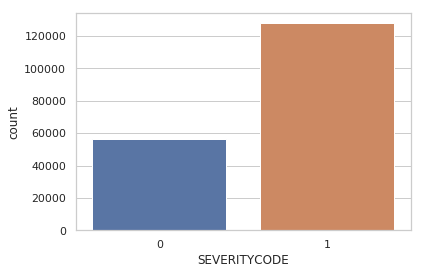

In [58]:
sns.countplot(x='SEVERITYCODE',data=data)

### More accidents involve property damage than collisions !!

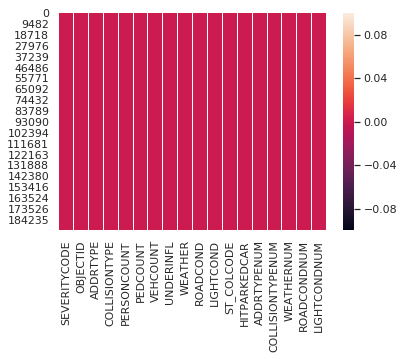

In [84]:
sns.heatmap(data.isnull())

### NO null values are present after data cleaning !

In [85]:
data.shape

(184166, 18)

In [167]:
data.shape

(184166, 18)

In [166]:
data.head(3)

,SEVERITYCODE,OBJECTID,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,HITPARKEDCAR,ADDRTYPENUM,COLLISIONTYPENUM,WEATHERNUM,ROADCONDNUM,LIGHTCONDNUM
0,1,1,Intersection,Angles,2,0,2,0,Overcast,Wet,Daylight,10,0,2,2,3,2,1
1,0,2,Block,Sideswipe,2,0,2,0,Raining,Wet,Dark - Street Lights On,11,0,1,5,2,2,2
2,0,3,Block,Parked Car,4,0,3,0,Overcast,Dry,Daylight,32,0,1,1,3,1,1


# Model Building !

In [168]:
X=np.asarray(data[['PERSONCOUNT','PEDCOUNT','VEHCOUNT','UNDERINFL','ST_COLCODE','HITPARKEDCAR','ADDRTYPENUM','COLLISIONTYPENUM','WEATHERNUM','ROADCONDNUM','LIGHTCONDNUM']])
X[0:5]

array([[ 2,  0,  2,  0, 10,  0,  2,  2,  3,  2,  1],
       [ 2,  0,  2,  0, 11,  0,  1,  5,  2,  2,  2],
       [ 4,  0,  3,  0, 32,  0,  1,  1,  3,  1,  1],
       [ 3,  0,  3,  0, 23,  0,  1,  4,  1,  1,  1],
       [ 2,  0,  2,  0, 10,  0,  2,  2,  2,  2,  1]])

In [169]:
y = np.asarray(data['SEVERITYCODE'])
y[0:5]

array([1, 0, 0, 0, 1])

In [170]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.3449933 , -0.19051521,  0.04790206, -0.22702845, -0.87463159,
        -0.17757887,  1.341968  , -0.61743879,  1.16266598,  0.75712334,
        -0.58437822],
       [-0.3449933 , -0.19051521,  0.04790206, -0.22702845, -0.8059266 ,
        -0.17757887, -0.71972025,  0.78334262,  0.23913052,  0.75712334,
         0.36312058],
       [ 1.11730284, -0.19051521,  1.83083082, -0.22702845,  0.63687814,
        -0.17757887, -0.71972025, -1.08436593,  1.16266598, -0.59439723,
        -0.58437822],
       [ 0.38615477, -0.19051521,  1.83083082, -0.22702845,  0.01853325,
        -0.17757887, -0.71972025,  0.31641548, -0.68440494, -0.59439723,
        -0.58437822],
       [-0.3449933 , -0.19051521,  0.04790206, -0.22702845, -0.87463159,
        -0.17757887,  1.341968  , -0.61743879,  0.23913052,  0.75712334,
        -0.58437822]])

### NOW split the dataset into train and test

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (147332, 11) (147332,)
Test set: (36834, 11) (36834,)


# Modelling using Logistic Regression

Lets build our model using LogisticRegression from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. Now lets fit our model with train set:

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## The class predictions are 

In [175]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

### But we need %of chance of injury !! Instead , we use this 

In [176]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.86610875, 0.13389125],
       [0.57884739, 0.42115261],
       [0.69900642, 0.30099358],
       ...,
       [0.90078452, 0.09921548],
       [0.53925924, 0.46074076],
       [0.79225709, 0.20774291]])

In [186]:
print("PROBABILITY ARRAY = %.2f ",yhat_prob*100)

PROBABILITY ARRAY = %.2f  [[86.61087514 13.38912486]
 [57.88473905 42.11526095]
 [69.90064155 30.09935845]
 ...
 [90.07845218  9.92154782]
 [53.92592449 46.07407551]
 [79.22570861 20.77429139]]


# Evaluation

### jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [188]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7253624368789705

### confusion matrix
Another way of looking at accuracy of classifier is to look at confusion matrix.

In [189]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 2257  8994]
 [ 1122 24461]]


Confusion matrix, without normalization
[[ 2257  8994]
 [ 1122 24461]]


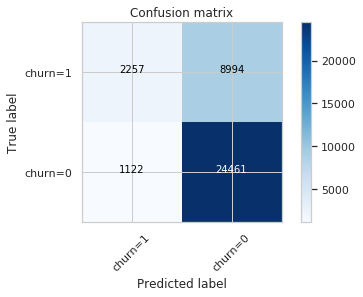

In [190]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [191]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.73      0.96      0.83     25583
           1       0.67      0.20      0.31     11251

   micro avg       0.73      0.73      0.73     36834
   macro avg       0.70      0.58      0.57     36834
weighted avg       0.71      0.73      0.67     36834



Based on the count of each section, we can calculate precision and recall of each label:

Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

Recall is true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate precision and recall of each class.

F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.67 in our case.

## LogLoss

In [193]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5449306198075325

# RESULT & DISCUSSION

## Some of the insights obtained are as follows 

1)We can understand that accidents at intersection are more inury prone & accidents at alley are mostly property damage only   colllsion! 
2)accidents in alley typically involved less persons
3)lesser influence of alcohol in accidents at intersections 
4)parked cars suffer much more damage in block
5)according to data pedestrian and cycle are involved in more injury prone and less property only damages 
6)Parked car and Sideswipe usualyy result in property only damages ! 
7)MOst accidents typically involve 2-3 persons and 1-2 vehicles
8)Less alcohol influence involved in Left and Right Turn accidents
9)NO influence of alcohol in accidents involving 13 or more people !
10)No parked cars where hit in accidents involving 10 or more people
11)No property was damaged in accidents involving 4 or more pedestrians 
12)No parked Cars hit in accidents with more than 10 vehicles
13)Parked cars hit more often under influence of alcohol 
14)More property damage in UNknown road conditions and comparitively more injuries in Oil road condition
15)NOalcohol influenced accidents in DARK-UNknown LIghting AND most in Dark-STreet lights on condition
16)Alcohol influence in hitting parked car is slightly higher than accidents not involving parked car !



The most important and yet time consuming job is to undergo data cleaning and this is true to a very large extent .
It was no much of a job identify the model as logistic regression and carry out the processing , fitting and transformation of data. The challenge in data cleaning comes from the fact that dataset is a very large one with very high no. of initial features (38 columns).

# CONCLUSION

The purpose of this project was to estimate the % of chance of injury and to derive useful insights from data which was a tedious task considering the immense no. of rows in the dataset. It can output % of chance of injury while considering factors such as road condition,light condition etc . \n
Ultimately it is the deciision of the traveller and in case of high risk emergencies we dont have any other choice but to continue the journey whatever the consequences are ! 
